# Logistic Regression - one of most popular classification methods

### Business problem - Showing ads to those people who are more likely to purchase product

Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

Getting features we will use

In [4]:
X = dataset.iloc[:,[2,3]].values

Splitting dataset to training and test sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'lbfgs', random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting

In [9]:
y_pred = classifier.predict(X_test)

Making confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [33]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

Visualizing training set

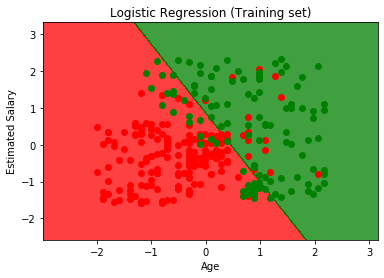

In [40]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

purchase_no  = X_set[ y_set == 0 ]  

plt.scatter(purchase_no[:,0],  purchase_no[:,1],  color='red')  

purchase_yes  = X_set[ y_set == 1]  

plt.scatter(purchase_yes[:,0], purchase_yes[:,1], color='green')
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.show()


Visualizing test set

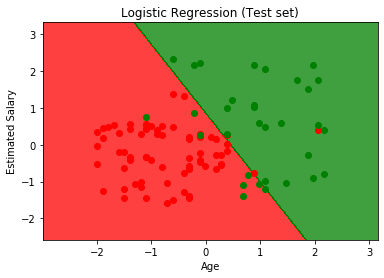

In [41]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

purchase_no  = X_set[ y_set == 0 ]  

plt.scatter(purchase_no[:,0],  purchase_no[:,1],  color='red')  

purchase_yes  = X_set[ y_set == 1]   
plt.scatter(purchase_yes[:,0], purchase_yes[:,1], color='green')
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()